## **Name:** Affan Zulfiqar

---

## **Reg No:** B22F0144AI050
---
## **Course:** Artificial neural Networks Lab (3)

# **Lab Task**
1. Build a neural network model using different activation functions.
2. Compare the performance of different activation functions (Sigmoid, Tanh, ReLU).
3. Analyze the effect of activation functions on accuracy and training time

# **Importing Libraries**

In [17]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score

# **Dataset Loading and Preprocessing**
**Loading the Dataset**

The dataset was loaded from a CSV file named spam.csv and print first 5 rows of the dataset.

In [27]:
data = pd.read_csv('email.csv')
print(data.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


**Encoding Labels**

The categorical labels in the Category column (such as "ham" and "spam") were converted into numerical values using LabelEncoder. Here, "ham" is encoded as 0 and "spam" as 1.

In [19]:
label_encoder = LabelEncoder()
data['Category'] = label_encoder.fit_transform(data['Category'])

**Text Vectorization**

The text data in the Message column was converted into numerical features using TF-IDF vectorization. The max_features=5000 parameter limited the vectorization to the top 5000 features, and English stop words were removed.

In [20]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(data['Message']).toarray()
y = data['Category'].values

**Splitting the Data**

The data was split into training and testing sets, with 80% used for training and 20% for testing.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Building**

A function build_model was defined to build the neural network model using different activation functions. The model consists of:

* An input layer with 16 neurons and a specified activation function.

*  A hidden layer with 8 neurons and the same activation function.

* An output layer with 1 neuron and a sigmoid activation function for
binary classification.

In [22]:
def build_model(activation):
    model = Sequential([
        Dense(16, activation=activation, input_shape=(X_train.shape[1],)),
        Dense(8, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# **Training and Evaluation**

The model was trained and evaluated using three activation functions: sigmoid, tanh, and relu. The training time and accuracy were recorded for each activation function.

In [23]:
activation_functions = ['sigmoid', 'tanh', 'relu']
results = {}

for activation in activation_functions:
    print(f'Training with {activation} activation...')
    model = build_model(activation)
    start_time = time.time()
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0, validation_data=(X_test, y_test))
    training_time = time.time() - start_time

    y_pred = (model.predict(X_test) > 0.5).astype(int)
    accuracy = accuracy_score(y_test, y_pred)

    results[activation] = {'accuracy': accuracy, 'training_time': training_time, 'history': history}
    print(f'{activation} - Accuracy: {accuracy:.4f}, Training Time: {training_time:.2f} sec\n')

Training with sigmoid activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
sigmoid - Accuracy: 0.9910, Training Time: 9.31 sec

Training with tanh activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
tanh - Accuracy: 0.9883, Training Time: 7.49 sec

Training with relu activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
relu - Accuracy: 0.9892, Training Time: 9.59 sec



# **Visualization**
**1.** **Accuracy Comparison Graph**
  
  A graph was generated to compare the accuracy of the model across different activation functions over epochs.





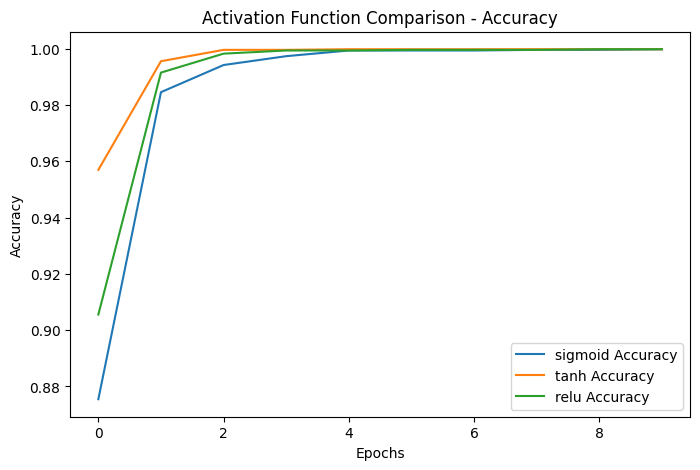

In [24]:
plt.figure(figsize=(8, 5))
for activation in activation_functions:
    plt.plot(results[activation]['history'].history['accuracy'], label=f'{activation} Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Activation Function Comparison - Accuracy')
plt.legend()
plt.show()

**2. Training Time Comparison Bar Chart**

A bar chart was generated to compare the training time of the model for different activation functions.

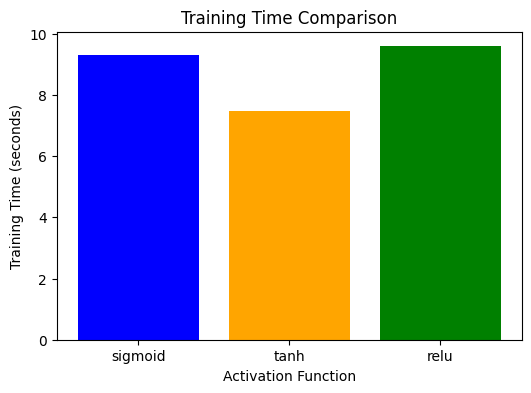

In [25]:
plt.figure(figsize=(6, 4))
plt.bar(results.keys(), [results[a]['training_time'] for a in activation_functions], color=['blue', 'orange', 'green'])
plt.xlabel('Activation Function')
plt.ylabel('Training Time (seconds)')
plt.title('Training Time Comparison')
plt.show()

# **Final Results**
The final results for each activation function were as follows:

In [26]:
for activation, metrics in results.items():
    print(f"{activation}: Accuracy = {metrics['accuracy']:.4f}, Training Time = {metrics['training_time']:.2f} sec")

sigmoid: Accuracy = 0.9910, Training Time = 9.31 sec
tanh: Accuracy = 0.9883, Training Time = 7.49 sec
relu: Accuracy = 0.9892, Training Time = 9.59 sec


# **Conclusion:**
**Accuracy Analysis**

Sigmoid is the most effective activation function **(99.10%)** for this specific task in terms of accuracy. However, the differences in accuracy between the three activation functions are minimal, indicating that all three are suitable for this classification problem.

**Training Time Analysis**

Tanh is the most efficient activation function **(7.49 sec)** in terms of training time. If computational efficiency is a priority, Tanh is the best choice. However, the difference in training time between Tanh and Sigmoid/ReLU is not significant, so this factor may not be critical unless working with very large datasets or limited computational resources.

**Final Recommendation**

* High Accuracy: Sigmoid.

* Fast Training: Tanh.

* Balanced Performance: Tanh.